In [23]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Get open urls to access stock information pages
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'AAPL', 'GOOG', 'FB']

news_tables = {}
for tick in tickers:
    url = finviz_url + tick
    req = Request(url=url, headers={"user-agent": "my-app"})
    response = urlopen(req)

    html = BeautifulSoup(response, 'html')
    news_table=html.find(id='news-table')
    news_tables[tick] = news_table

In [11]:
news_table

<table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
<tr><td align="right" style="white-space:nowrap" width="130">Oct-24-21 08:21PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/stocks-set-mixed-start-turkey-211735951.html" target="_blank">Stocks, U.S. Futures Decline; Turkeys Lira Slides: Markets Wrap</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Bloomberg</span></div></div></td></tr>
<tr><td align="right" width="130">05:06PM  </td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/big-tech-companies-report-earnings-what-to-know-this-week-210653395.html" target="_blank">Big Tech companies report earnings: What to know this week</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Yah

In [15]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'):
        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
        
        parsed_data.append([ticker, date, time, title])

parsed_data


[['AMZN',
  'Oct-24-21',
  '08:21PM\xa0\xa0',
  'Stocks, U.S. Futures Decline; Turkeys Lira Slides: Markets Wrap'],
 ['AMZN',
  'Oct-24-21',
  '05:06PM\xa0\xa0',
  'Big Tech companies report earnings: What to know this week'],
 ['AMZN',
  'Oct-24-21',
  '04:16PM\xa0\xa0',
  'Holiday earnings forecasts have been lumps of coal so far, and here come the biggest ones'],
 ['AMZN',
  'Oct-24-21',
  '03:00PM\xa0\xa0',
  'Pinterest Earnings: What to Watch on Nov. 4'],
 ['AMZN',
  'Oct-24-21',
  '10:25AM\xa0\xa0',
  "China's property bubble just got pricked  this could mean trouble for the stock market"],
 ['AMZN',
  'Oct-24-21',
  '09:51AM\xa0\xa0',
  '2-Must See Earnings Reports This Week'],
 ['AMZN',
  'Oct-24-21',
  '09:32AM\xa0\xa0',
  'Need a Side Gig for the Holidays? This Retailer Is Hiring'],
 ['AMZN',
  'Oct-24-21',
  '07:00AM\xa0\xa0',
  'These 3 Stocks Are Up at Least 7,400%. Are They Still Buys?'],
 ['AMZN',
  'Oct-24-21',
  '06:26AM\xa0\xa0',
  '11 Best High Dividend Stocks To Buy

In [18]:
# Create a dataframe to host parsed data
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df

,ticker,date,time,title
0,AMZN,Oct-24-21,08:21PM,"Stocks, U.S. Futures Decline; Turkeys Lira Sli..."
1,AMZN,Oct-24-21,05:06PM,Big Tech companies report earnings: What to kn...
2,AMZN,Oct-24-21,04:16PM,Holiday earnings forecasts have been lumps of ...
3,AMZN,Oct-24-21,03:00PM,Pinterest Earnings: What to Watch on Nov. 4
4,AMZN,Oct-24-21,10:25AM,China's property bubble just got pricked this...
...,...,...,...,...
95,AMZN,Oct-20-21,03:08PM,Facebook stock looks silly cheap: analyst
96,AMZN,Oct-20-21,02:01PM,How Brian Cornell Turned Around Target
97,AMZN,Oct-20-21,12:00PM,Today at Amazon Accelerate: Amazon to Launch t...
98,AMZN,Oct-20-21,12:00PM,Today at Amazon Accelerate: Amazon Launches Ne...


In [19]:
# Initalize vader
vader = SentimentIntensityAnalyzer()

In [21]:
# Apply sentiment analysis to titles
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df

,ticker,date,time,title,compound
0,AMZN,Oct-24-21,08:21PM,"Stocks, U.S. Futures Decline; Turkeys Lira Sli...",0.0000
1,AMZN,Oct-24-21,05:06PM,Big Tech companies report earnings: What to kn...,0.0000
2,AMZN,Oct-24-21,04:16PM,Holiday earnings forecasts have been lumps of ...,0.4019
3,AMZN,Oct-24-21,03:00PM,Pinterest Earnings: What to Watch on Nov. 4,0.0000
4,AMZN,Oct-24-21,10:25AM,China's property bubble just got pricked this...,-0.5106
...,...,...,...,...,...
95,AMZN,Oct-20-21,03:08PM,Facebook stock looks silly cheap: analyst,0.0258
96,AMZN,Oct-20-21,02:01PM,How Brian Cornell Turned Around Target,0.0000
97,AMZN,Oct-20-21,12:00PM,Today at Amazon Accelerate: Amazon to Launch t...,0.3400
98,AMZN,Oct-20-21,12:00PM,Today at Amazon Accelerate: Amazon Launches Ne...,0.3400


In [22]:
# Convert the date from string to date-time format
df['date'] = pd.to_datetime(df.date).dt.date

In [25]:
# Get average sentiment for each day
mean_df = df.groupby(['ticker', 'date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound', axis='columns').transpose()
mean_df

ticker,AMZN
date,
2021-10-20,0.159177
2021-10-21,0.100800
2021-10-22,0.072888
2021-10-23,0.119208
2021-10-24,0.101118


<Figure size 1152x576 with 0 Axes>

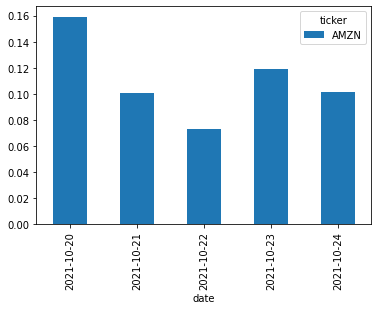

In [26]:
# Visualize the data
plt.figure(figsize=(16, 8))
mean_df.plot(kind='bar')
plt.show()